#Importing Libraries and Overview of Dataset

In [81]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import classification_report
sns.set()

##Loading Dataset

In [82]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Iris Flower Classification Model/iris_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [85]:
df.nunique()

,0
5.1,35
3.5,23
1.4,43
0.2,22
Iris-setosa,3


In [86]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_cols = ['species']

#EDA

##Numerical values

In [87]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
petal_width,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5


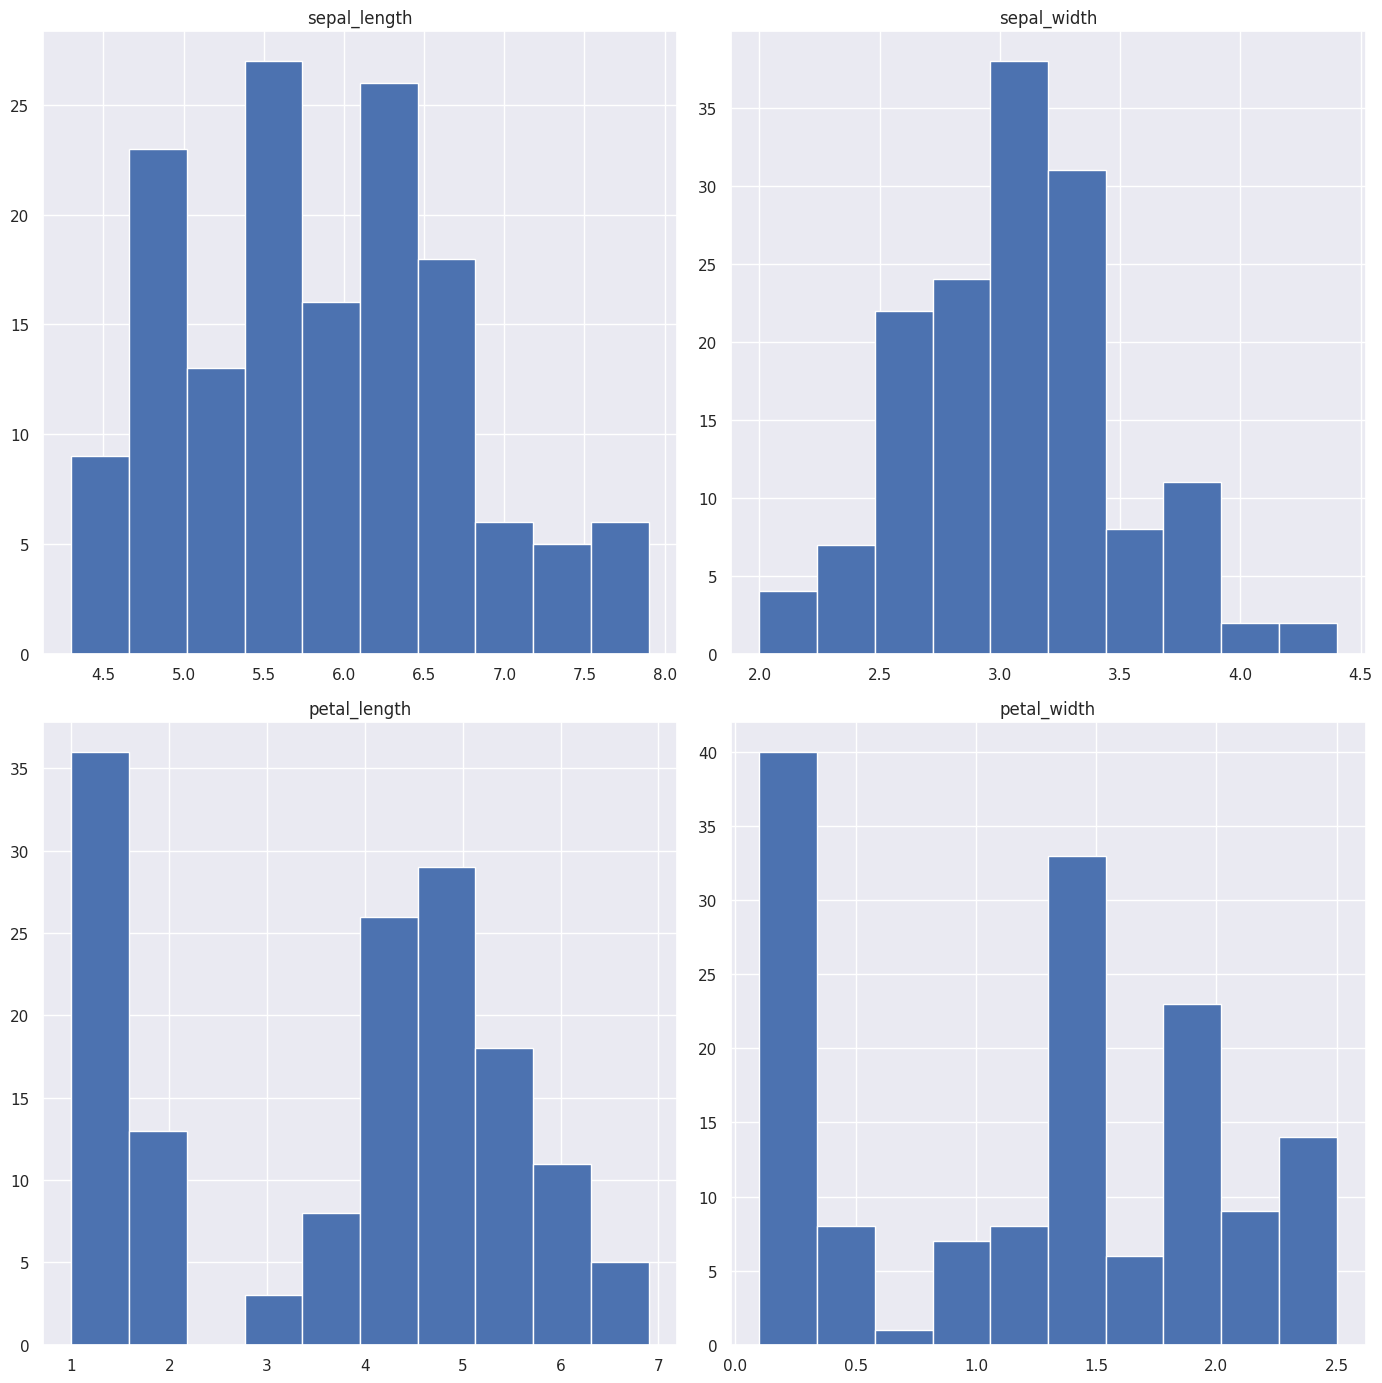

In [88]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.tight_layout()

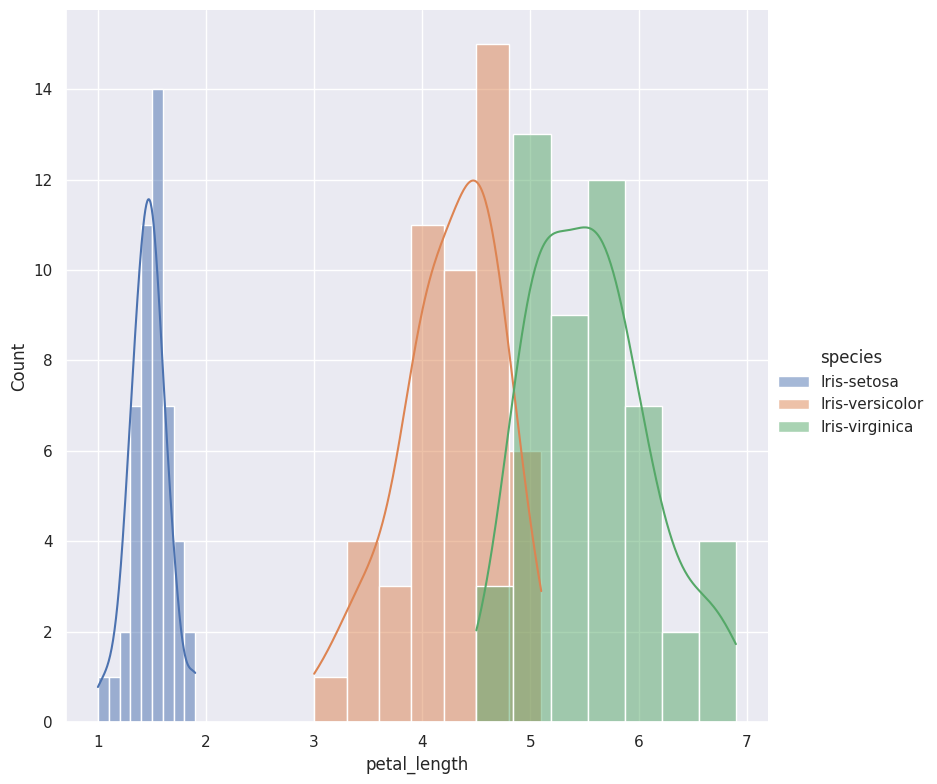

In [89]:
sns.FacetGrid(df, hue="species", height=8) \
    .map(sns.histplot, "petal_length", kde=True) \
    .add_legend()

plt.show()

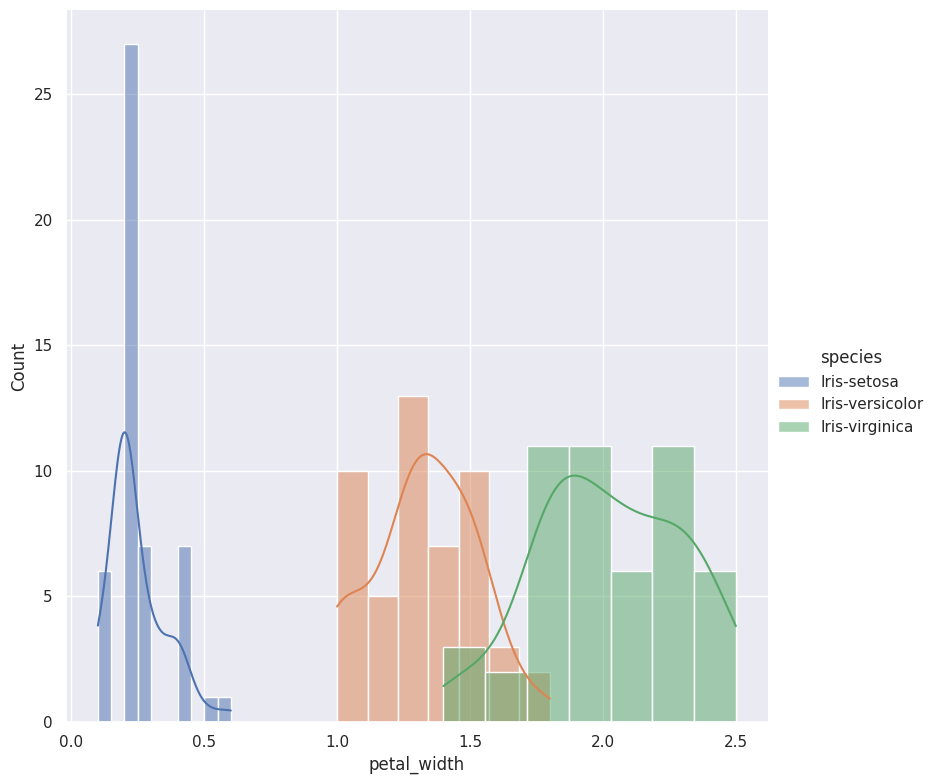

In [90]:
sns.FacetGrid(df, hue="species", height=8) \
    .map(sns.histplot, "petal_width", kde=True) \
    .add_legend()

plt.show()

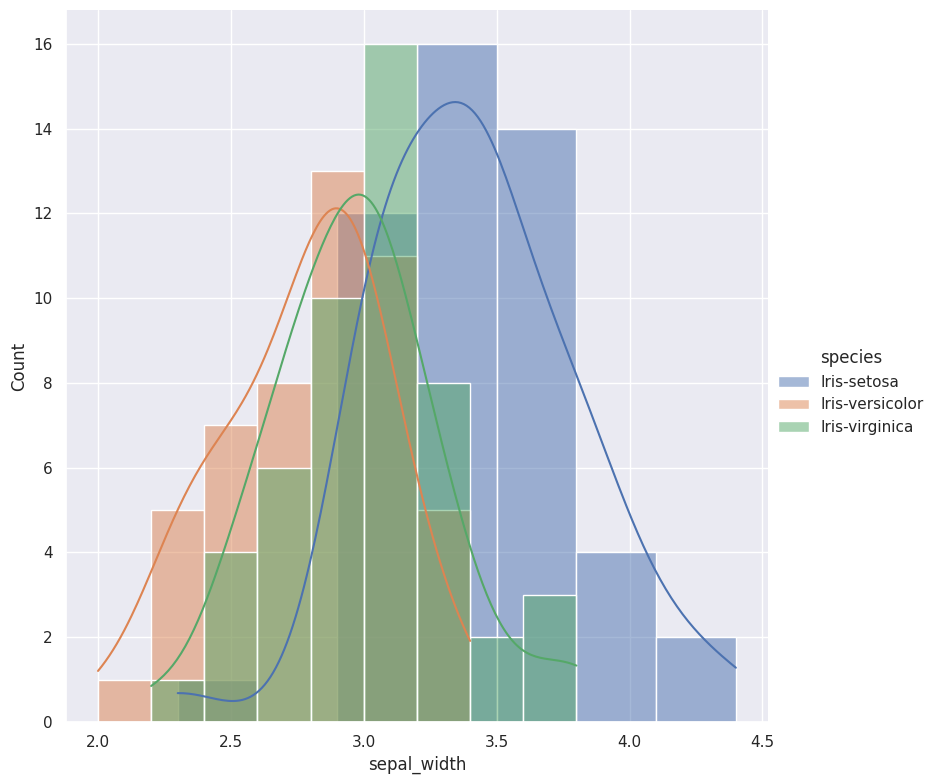

In [91]:
sns.FacetGrid(df, hue="species", height=8) \
    .map(sns.histplot, "sepal_width", kde=True) \
    .add_legend()

plt.show()

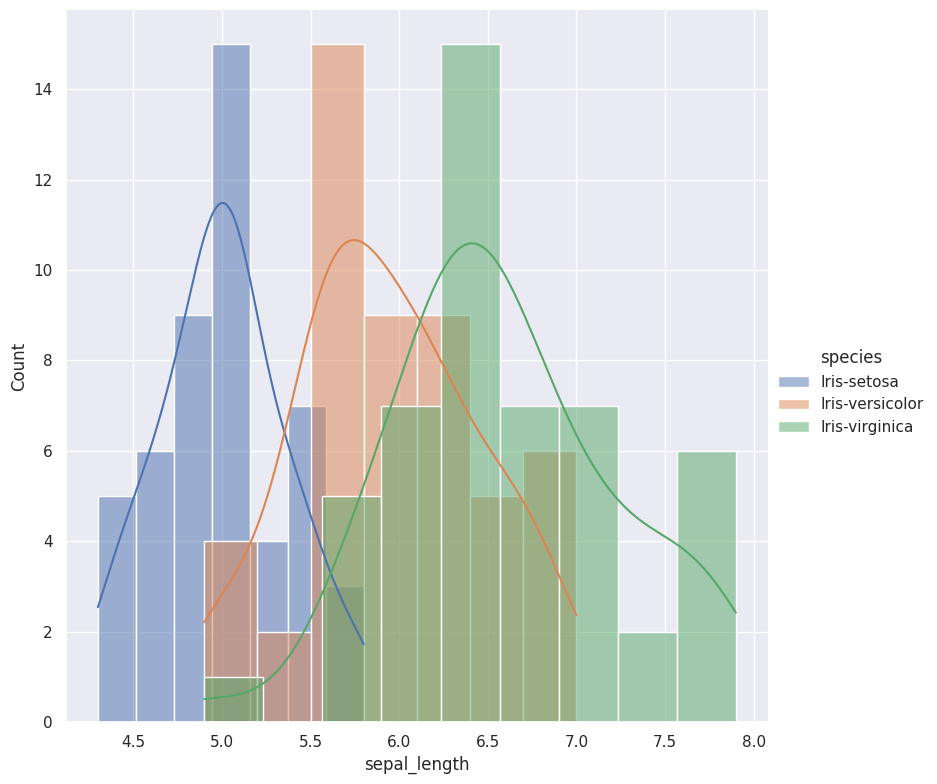

In [92]:

sns.FacetGrid(df, hue="species", height=8) \
    .map(sns.histplot, "sepal_length", kde=True) \
    .add_legend()

plt.show()

##Categorical Values

In [93]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)

species
Iris-versicolor    0.335570
Iris-virginica     0.335570
Iris-setosa        0.328859
Name: proportion, dtype: float64
****************************************


In [94]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    Parameters:
    - data: DataFrame
    - feature: DataFrame column
    - perc: Whether to display percentages instead of count (default is False)
    - n: Displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Total number of occurrences
    count = data[feature].nunique()  # Number of unique categories

    if n is None:
        n = count  # Default to show all categories if n is not specified
    order = data[feature].value_counts(ascending=False).index[:n]  # Top n categories

    fig, ax = plt.subplots(figsize=(max(n*1.5, 10), 8))  # Adjust figure size based on n
    sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot

    for p in ax.patches:
        height = p.get_height()
        label = "{:.1f}%".format(100 * height / total) if perc else int(height)
        x = p.get_x() + p.get_width() / 2
        y = height + 0.01  # Slight offset above the bar

        ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Distribution of {feature}')  # Optional title
    plt.show()

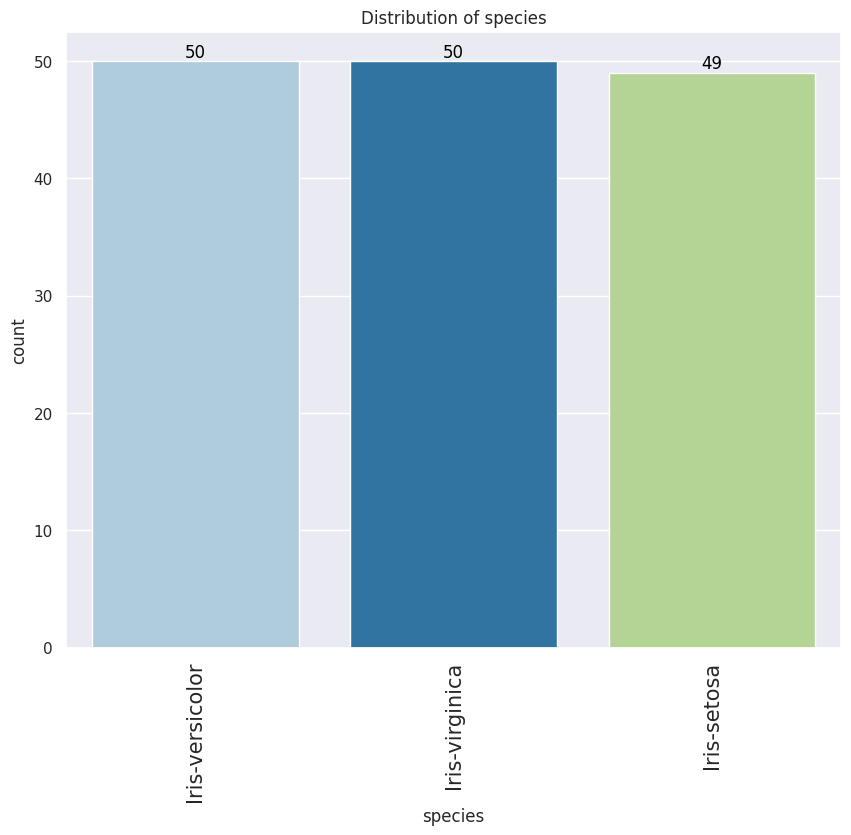

In [95]:
labeled_barplot(df,'species')

##BiVariate Analysis

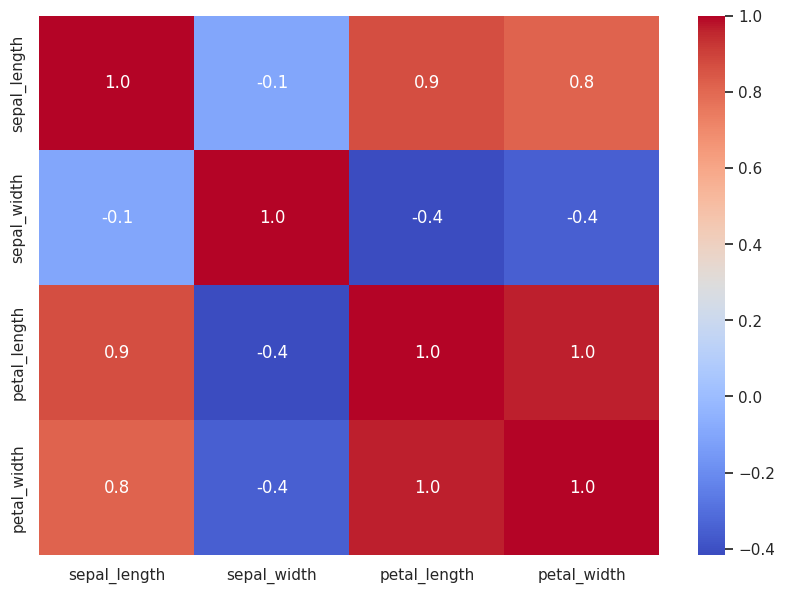

In [96]:
corr = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            fmt = ".1f",
            xticklabels = corr.columns,
            yticklabels = corr.columns);

#Data Preprocessing

In [97]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [98]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Label Encoding

In [99]:
label_encoder = preprocessing.LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])

df['species'].unique()

array([0, 1, 2])

##Spliting Dataset

In [100]:
X = df.drop(["species"], axis=1)

y = df["species"]


In [101]:
len(X)

149

In [102]:
len(y)

149

#Model Development

##Spliting training and test dataset

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)

##Feature Scaling

In [104]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

##Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [106]:
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
rmse = sqrt(mean_squared_error(y_test, prediction))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9555555555555556
RMSE value = 0.21
R2 Score= 0.93


## KNN Algorithm

In [107]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [108]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
predict = model.predict(X_test)

In [110]:
#for checking the model accuracy
print('The accuracy of the KNN is',accuracy_score(predict,y_test))
rmse = sqrt(mean_squared_error(y_test, predict))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, predict))

The accuracy of the KNN is 0.9555555555555556
RMSE value = 0.21
R2 Score= 0.93


## SVM

In [111]:
from sklearn import svm
svc = svm.SVC(C=1.0, kernel='rbf')

In [112]:
svc.fit(X_train,y_train)

SVC()

In [113]:
pred = svc.predict(X_test)

In [114]:
print('The accuracy of the SVM is: %.2f'%accuracy_score(pred,y_test))
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, pred))

The accuracy of the SVM is: 0.96
RMSE value = 0.21
R2 Score= 0.93


## Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [116]:
# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [117]:
y_pred = dt_model.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def decision_tree_metrics(actual, predicted, class_labels):
    """
    Function to print accuracy, precision, recall, F1-score, classification report,
    confusion matrix, and class-wise TP, FP, TN, FN for a Decision Tree Classifier.

    Parameters:
    - actual: True labels
    - predicted: Predicted labels
    - class_labels: List of class names (for multi-class problems)
    """

    # Overall Accuracy
    accuracy = accuracy_score(actual, predicted)
    print(f"\n✅ Accuracy: {accuracy:.2f}")

    # Precision, Recall, and F1-score (Macro for multi-class)
    precision = precision_score(actual, predicted, average='macro')
    recall = recall_score(actual, predicted, average='macro')
    f1 = f1_score(actual, predicted, average='macro')

    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1-Score: {f1:.2f}")

    # Print classification report
    print("\nClassification Report:\n", classification_report(actual, predicted, target_names=class_labels))

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Confusion Matrix Breakdown (TP, FP, FN, TN for each class)
    print("\n🔹 Confusion Matrix Breakdown per Class:")
    for i, label in enumerate(class_labels):
        TP = cm[i, i]
        FN = np.sum(cm[i, :]) - TP
        FP = np.sum(cm[:, i]) - TP
        TN = np.sum(cm) - (TP + FP + FN)

        print(f"Class '{label}': TP={TP}, FP={FP}, FN={FN}, TN={TN}")

    # Plot Confusion Matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix - Decision Tree")
    plt.show()

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }


✅ Accuracy: 0.96
✅ Precision: 0.96
✅ Recall: 0.96
✅ F1-Score: 0.95

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.87      0.93        15
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


🔹 Confusion Matrix Breakdown per Class:
Class 'setosa': TP=16, FP=0, FN=0, TN=29
Class 'versicolor': TP=13, FP=0, FN=2, TN=30
Class 'virginica': TP=14, FP=2, FN=0, TN=29


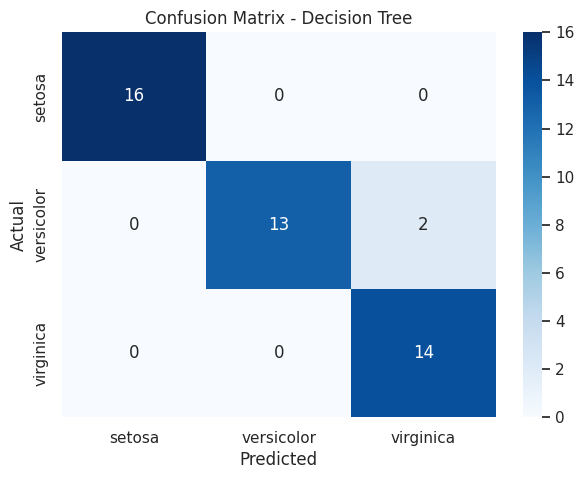

{'Accuracy': 0.9555555555555556,
 'Precision': 0.9583333333333334,
 'Recall': 0.9555555555555556,
 'F1 Score': 0.953968253968254,
 'Confusion Matrix': array([[16,  0,  0],
        [ 0, 13,  2],
        [ 0,  0, 14]])}

In [119]:
# Call the function after training the Decision Tree
decision_tree_metrics(y_test, y_pred, class_labels=['setosa', 'versicolor', 'virginica'])